In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the dataset
df =pd.read_excel('AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
# Data Preprocessing
# Replace missing values (-200) with NaN and drop them
df.replace(-200, np.nan, inplace=True)
df.dropna(inplace=True)
# df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
# Select features and target
features = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
            'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
target = 'C6H6(GT)'  # Predicting Benzene concentration as AQI proxy


In [ ]:
print("Before conversion:")
print(df[features + [target]].dtypes)



Before conversion:
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
C6H6(GT)         float64
dtype: object


In [ ]:
# Convert to numeric and check for NaNs
X = df[features].apply(pd.to_numeric, errors='coerce').dropna()
y = df[target].apply(pd.to_numeric, errors='coerce').dropna()

print("After conversion:")
print(X.dtypes)
print(y.dtypes)

# Check for NaNs in X and y
print("Number of NaNs in features (X):")
print(X.isna().sum())

print("Number of NaNs in target (y):")
print(y.isna().sum())



After conversion:
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object
float64
Number of NaNs in features (X):
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
Number of NaNs in target (y):
0


In [ ]:
X = df[features].apply(pd.to_numeric, errors='coerce')
y = df[target].apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y[X.index]
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (827, 13)
Shape of y: (827,)


In [63]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.01805735, -0.36604274,  0.20740177, ..., -0.18737571,
        -0.49109096, -0.79732067],
       [ 1.87634224,  1.12674708,  2.14593885, ..., -0.20311337,
        -0.12961045, -0.2962221 ],
       [-0.26783264, -0.03163266, -0.54780994, ..., -0.16114633,
         0.19752126,  0.23642847],
       ...,
       [-0.62519512, -0.36289782, -0.7498411 , ..., -1.78737074,
         0.9760945 , -1.04008326],
       [ 0.58983731,  1.03344772,  1.07805987, ...,  0.96671917,
        -0.40767235,  0.96988826],
       [ 1.30456227,  1.481075  ,  0.48158692, ...,  0.86704727,
        -0.68409856,  0.26126651]])

In [68]:
# Define Gaussian Process model
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, DotProduct

# Example kernels
kernel1 = RBF()  # Default Radial Basis Function kernel
kernel2 = Matern(nu=1.5)  # Matern kernel with smoothness parameter
kernel3 = RationalQuadratic(alpha=1.0, length_scale=1.0)
kernel4 = DotProduct() + RBF()  # Combination kernel

# Apply to Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel2, n_restarts_optimizer=10)
gp.fit(X_train, y_train)


GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=10)

In [69]:
# Predict on test data
y_pred, sigma = gp.predict(X_test, return_std=True)

In [71]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.016016191680809987
R2 Score: 0.9997309337941902


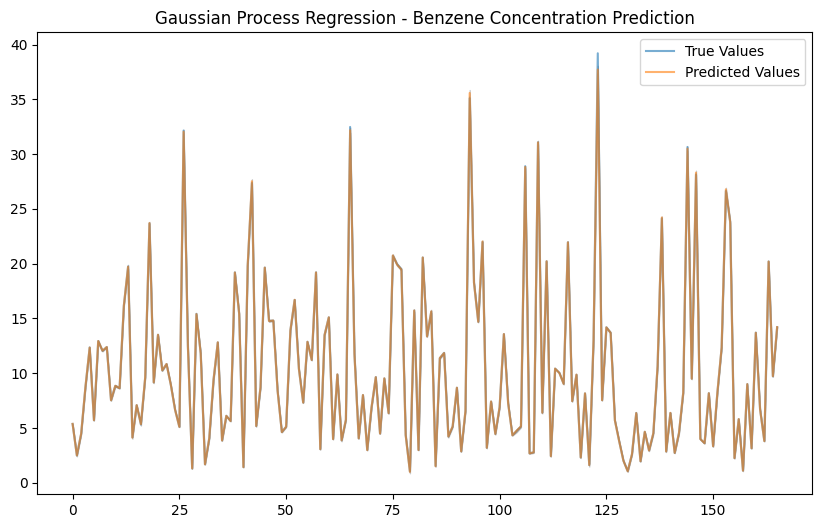

In [72]:
# Visualize predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values', alpha=0.6)
plt.plot(y_pred, label='Predicted Values', alpha=0.6)
plt.fill_between(range(len(y_pred)), y_pred - 2 * sigma, y_pred + 2 * sigma, alpha=0.2, color='k')
plt.legend()
plt.title('Gaussian Process Regression - Benzene Concentration Prediction')
plt.show()

In [77]:
!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.3 MB/s eta 0:00:00


In [78]:
# Bayesian Networks:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination



In [80]:

# Data Preprocessing
# Replace missing values (-200) with NaN and drop them
df.replace(-200, pd.NA, inplace=True)
df.dropna(inplace=True)

features = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
            'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'T', 'RH']
data = df[features]

# Ensure data is integer (discretize if necessary)
data = data.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Define the structure of the Bayesian Network
model = BayesianNetwork([
    ('CO(GT)', 'NMHC(GT)'),
    ('CO(GT)', 'C6H6(GT)'),
    ('NMHC(GT)', 'C6H6(GT)'),
    ('C6H6(GT)', 'NOx(GT)'),
    ('NOx(GT)', 'NO2(GT)'),
    ('PT08.S1(CO)', 'CO(GT)'),
    ('PT08.S2(NMHC)', 'NMHC(GT)'),
    ('PT08.S3(NOx)', 'NOx(GT)'),
    ('T', 'CO(GT)'),  # Weather affecting CO levels
    ('RH', 'NO2(GT)')  # Humidity affecting NO2 levels
])

In [81]:
# Train the Bayesian Network using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)


In [82]:
# Perform Inference
inference = VariableElimination(model)

In [89]:
# Query the model for probabilities
print("\n--- Conditional Probability Queries ---")
query_result_1 = inference.query(variables=['NO2(GT)'], evidence={'CO(GT)': 3, 'RH': 60})
print("Query result for NO2(GT) given CO(GT)=3 and RH=60:\n", query_result_1)



--- Conditional Probability Queries ---
Query result for NO2(GT) given CO(GT)=3 and RH=60:
 +--------------+----------------+
| NO2(GT)      |   phi(NO2(GT)) |
+==============+================+
| NO2(GT)(19)  |         0.0063 |
+--------------+----------------+
| NO2(GT)(20)  |         0.0063 |
+--------------+----------------+
| NO2(GT)(22)  |         0.0063 |
+--------------+----------------+
| NO2(GT)(25)  |         0.0063 |
+--------------+----------------+
| NO2(GT)(26)  |         0.0063 |
+--------------+----------------+
| NO2(GT)(28)  |         0.0095 |
+--------------+----------------+
| NO2(GT)(29)  |         0.0095 |
+--------------+----------------+
| NO2(GT)(30)  |         0.0063 |
+--------------+----------------+
| NO2(GT)(31)  |         0.0063 |
+--------------+----------------+
| NO2(GT)(32)  |         0.0063 |
+--------------+----------------+
| NO2(GT)(35)  |         0.0063 |
+--------------+----------------+
| NO2(GT)(36)  |         0.0063 |
+--------------+-------

In [91]:
query_result_2 = inference.query(variables=['C6H6(GT)'], evidence={'NMHC(GT)': 150, 'T': 25})
print("\nQuery result for C6H6(GT) given NMHC(GT)=2 and T=25:\n", query_result_2)



Query result for C6H6(GT) given NMHC(GT)=2 and T=25:
 +--------------+-----------------+
| C6H6(GT)     |   phi(C6H6(GT)) |
+==============+=================+
| C6H6(GT)(0)  |          0.0133 |
+--------------+-----------------+
| C6H6(GT)(1)  |          0.0133 |
+--------------+-----------------+
| C6H6(GT)(2)  |          0.0133 |
+--------------+-----------------+
| C6H6(GT)(3)  |          0.0133 |
+--------------+-----------------+
| C6H6(GT)(4)  |          0.0133 |
+--------------+-----------------+
| C6H6(GT)(5)  |          0.0133 |
+--------------+-----------------+
| C6H6(GT)(6)  |          0.0133 |
+--------------+-----------------+
| C6H6(GT)(7)  |          0.1174 |
+--------------+-----------------+
| C6H6(GT)(8)  |          0.0133 |
+--------------+-----------------+
| C6H6(GT)(9)  |          0.0133 |
+--------------+-----------------+
| C6H6(GT)(10) |          0.0133 |
+--------------+-----------------+
| C6H6(GT)(11) |          0.4031 |
+--------------+-----------------+


In [92]:
# Evaluate the model: Compute marginal probabilities for all features
print("\n--- Marginal Probability Distributions ---")
for col in features:
    result = inference.query(variables=[col])
    print(f"\nProbability distribution for {col}:\n{result}")

Streaming output truncated to the last 5000 lines.
| PT08.S1(CO)(1044) |             0.0036 |
+-------------------+--------------------+
| PT08.S1(CO)(1045) |             0.0036 |
+-------------------+--------------------+
| PT08.S1(CO)(1046) |             0.0036 |
+-------------------+--------------------+
| PT08.S1(CO)(1047) |             0.0024 |
+-------------------+--------------------+
| PT08.S1(CO)(1050) |             0.0012 |
+-------------------+--------------------+
| PT08.S1(CO)(1051) |             0.0024 |
+-------------------+--------------------+
| PT08.S1(CO)(1052) |             0.0036 |
+-------------------+--------------------+
| PT08.S1(CO)(1054) |             0.0012 |
+-------------------+--------------------+
| PT08.S1(CO)(1055) |             0.0012 |
+-------------------+--------------------+
| PT08.S1(CO)(1058) |             0.0024 |
+-------------------+--------------------+
| PT08.S1(CO)(1060) |             0.0024 |
+-------------------+--------------------+
| P

In [1]:
import csv

# Define the dataset
data = [
    ["The air quality in the city is really bad today. I can barely breathe!"],
    ["The government needs to do something about the increasing pollution levels."],
    ["Pollution is causing so many health problems for everyone."],
    ["Air quality is much better in rural areas compared to urban cities."],
    ["I'm worried about how the smog is affecting my kids' health."],
    ["Clean air is a basic human right. We need stricter policies to control emissions."],
    ["The pollution levels have been decreasing due to recent environmental policies."],
    ["The weather is good, but the pollution levels are still high in the downtown area."],
    ["Reducing traffic congestion could significantly improve air quality."],
    ["Air purifiers are selling like crazy due to rising awareness about indoor air quality."]
]

# Write the dataset to a CSV file
with open('air_quality_sentiment.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['text'])  # Add the header
    writer.writerows(data)

print("Dataset written to air_quality_sentiment.csv")


Dataset written to air_quality_sentiment.csv


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [4]:

data = pd.read_csv('air_quality_sentiment.csv')


In [6]:
# Preprocessing the text data
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

In [7]:
data['cleaned_text'] = data['text'].apply(preprocess_text)


In [8]:
# Convert text data to a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
text_bow = vectorizer.fit_transform(data['cleaned_text'])


In [9]:
# Fit the Latent Dirichlet Allocation model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Assuming 5 topics
lda.fit(text_bow)


LatentDirichletAllocation(n_components=5, random_state=42)

In [10]:
# Display the top words in each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

print("Top words per topic:")
display_topics(lda, vectorizer.get_feature_names_out(), 10)


Top words per topic:
Topic 0:
pollution levels quality air causing problems policies health worried kids
Topic 1:
air quality right emissions stricter human control clean basic need
Topic 2:
air quality policies selling purifiers indoor like rising crazy awareness
Topic 3:
levels pollution government increasing needs quality air causing problems policies
Topic 4:
health pollution urban areas better cities compared rural area downtown


In [11]:
# Transform the text data to topic distributions
data['topic'] = lda.transform(text_bow).argmax(axis=1)

print("Assigned topics for each document:")
print(data[['text', 'topic']].head())

Assigned topics for each document:
                                                text  topic
0  The air quality in the city is really bad toda...      1
1  The government needs to do something about the...      3
2  Pollution is causing so many health problems f...      4
3  Air quality is much better in rural areas comp...      4
4  I'm worried about how the smog is affecting my...      4
